In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [153]:
df_train = pd.read_csv('data/train.csv')

train_size = df_train.shape[0]
print("Train Set Size: {} ".format(train_size))

df_test = pd.read_csv('data/test.csv')

test_size = df_test.shape[0]
print("Test Set Size: {} ".format(test_size))

all_data = pd.concat([df_train, df_test], sort=False)

Train Set Size: 1460 
Test Set Size: 1459 


In [173]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [174]:
all_data.get_dtype_counts()

float64    12
int64      26
object     43
dtype: int64

---

## Data Analysis

---

### 1 - EDA

The objective of this step is to know the data, the relations between the variables and the distributions of the features.

In [177]:
all_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal   208500.0  
1      5   2007        WD         Normal   181500.0  
2      9   2008        WD         Normal   223500.0  
3      2   2006        WD        Abnorml   140000.0  
4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [179]:
all_data.describe().transpose()

count           mean           std      min       25%  \
Id             2919.0    1460.000000    842.787043      1.0     730.5   
MSSubClass     2919.0      57.137718     42.517628     20.0      20.0   
LotFrontage    2433.0      69.305795     23.344905     21.0      59.0   
LotArea        2919.0   10168.114080   7886.996359   1300.0    7478.0   
OverallQual    2919.0       6.089072      1.409947      1.0       5.0   
OverallCond    2919.0       5.564577      1.113131      1.0       5.0   
YearBuilt      2919.0    1971.312778     30.291442   1872.0    1953.5   
YearRemodAdd   2919.0    1984.264474     20.894344   1950.0    1965.0   
MasVnrArea     2896.0     102.201312    179.334253      0.0       0.0   
BsmtFinSF1     2918.0     441.423235    455.610826      0.0       0.0   
BsmtFinSF2     2918.0      49.582248    169.205611      0.0       0.0   
BsmtUnfSF      2918.0     560.772104    439.543659      0.0     220.0   
TotalBsmtSF    2918.0    1051.777587    440.766258      0.0     793.0   
1stFlrSF       2919.0    1159.581706    392.362079    334.0     876.0   
2ndFlrSF       2919.0     336.483727    428.701456      0.0       0.0   
LowQualFinSF   2919.0       4.694416     46.396825      0.0       0.0   
GrLivArea      2919.0    1500.759849    506.051045    334.0    1126.0   
BsmtFullBath   2917.0       0.429894      0.524736      0.0       0.0   
BsmtHalfBath   2917.0       0.061364      0.245687      0.0       0.0   
FullBath       2919.0       1.568003      0.552969      0.0       1.0   
HalfBath       2919.0       0.380267      0.502872      0.0       0.0   
BedroomAbvGr   2919.0       2.860226      0.822693      0.0       2.0   
KitchenAbvGr   2919.0       1.044536      0.214462      0.0       1.0   
TotRmsAbvGrd   2919.0       6.451524      1.569379      2.0       5.0   
Fireplaces     2919.0       0.597122      0.646129      0.0       0.0   
GarageYrBlt    2760.0    1978.113406     25.574285   1895.0    1960.0   
GarageCars     2918.0       1.766621      0.761624      0.0       1.0   
GarageArea     2918.0     472.874572    215.394815      0.0     320.0   
WoodDeckSF     2919.0      93.709832    126.526589      0.0       0.0   
OpenPorchSF    2919.0      47.486811     67.575493      0.0       0.0   
EnclosedPorch  2919.0      23.098321     64.244246      0.0       0.0   
3SsnPorch      2919.0       2.602261     25.188169      0.0       0.0   
ScreenPorch    2919.0      16.062350     56.184365      0.0       0.0   
PoolArea       2919.0       2.251799     35.663946      0.0       0.0   
MiscVal        2919.0      50.825968    567.402211      0.0       0.0   
MoSold         2919.0       6.213087      2.714762      1.0       4.0   
YrSold         2919.0    2007.792737      1.314964   2006.0    2007.0   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.0   

                    50%       75%       max  
Id               1460.0    2189.5    2919.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        68.0      80.0     313.0  
LotArea          9453.0   11570.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1973.0    2001.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     164.0    1600.0  
BsmtFinSF1        368.5     733.0    5644.0  
BsmtFinSF2          0.0       0.0    1526.0  
BsmtUnfSF         467.0     805.5    2336.0  
TotalBsmtSF       989.5    1302.0    6110.0  
1stFlrSF         1082.0    1387.5    5095.0  
2ndFlrSF            0.0     704.0    2065.0  
LowQualFinSF        0.0       0.0    1064.0  
GrLivArea        1444.0    1743.5    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       4.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      15.0  
Fireplaces        

In [182]:
# First i'm going to split the features in two groups: numeric (quantitatives) and object (qualitatives)
numeric_features = all_data.select_dtypes(exclude=['object']).columns
categorical_features = all_data.select_dtypes(include=['object']).columns

#### 1.1 - Numeric Features

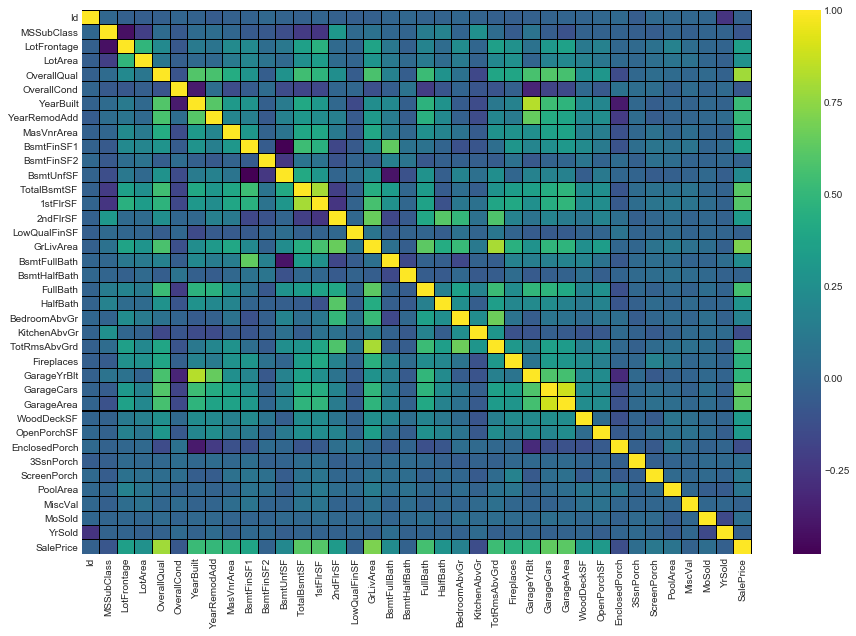

In [193]:
# Plot a heatmap to understand how the features are correlated with the target (SalePrice).
plt.figure(figsize=(15,10))
sns.heatmap(all_data[numeric_features].corr(), cmap='viridis', linewidths=.01, linecolor='black')

It seems that `OverallQual`, `GrLivArea`, `GarageCars` and some others are highly correlated with the `SalePrice`, wich makes total sense.

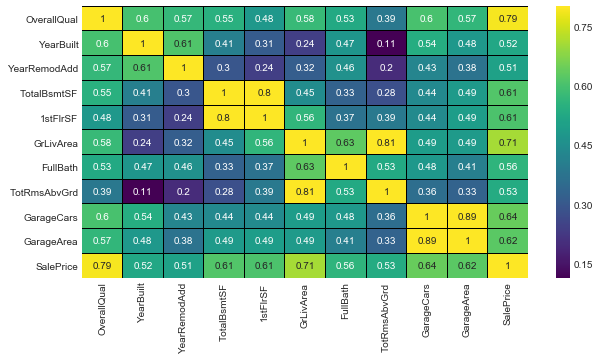

In [206]:
# Selecting the most correlated features with the Sale Price...(> 0.5)
price_correlation = all_data.corr()
price_correlation = price_correlation[price_correlation > 0.5]['SalePrice'].dropna()

# Plotting a simplified version of the heatmap for better understanding.
plt.figure(figsize=(10,5))
sns.heatmap(all_data[price_correlation.index].corr(), cmap='viridis', linewidths=.02, annot=True, linecolor='black', vmax=0.8)

- `OverallQual`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageCars` and `GarageArea` are strongly correlated w/ `SalePrice`.
- `TotalBsmtSF` and `1stFlrSF` are strongly correlated.
- `GrLivArea` and `TotRmsAbvGrd` are strongly correlated.
- `GarageCars` and `GarageArea`are strongly correlated.

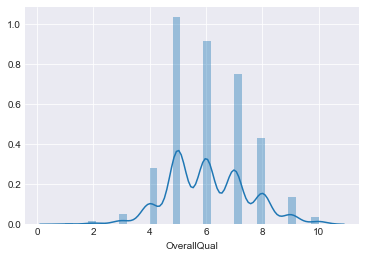

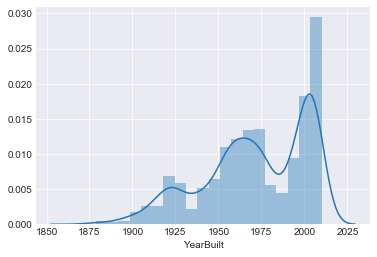

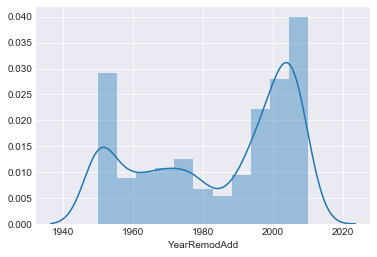

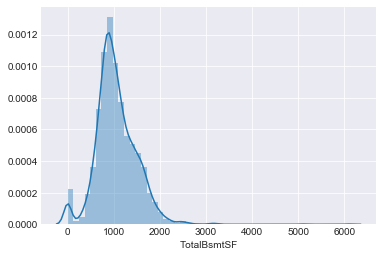

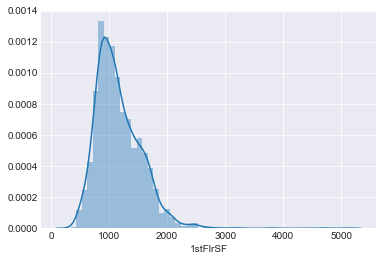

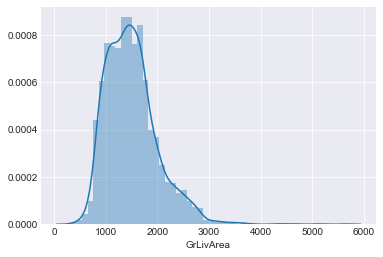

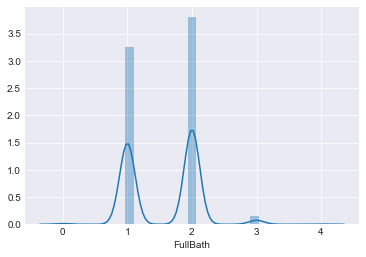

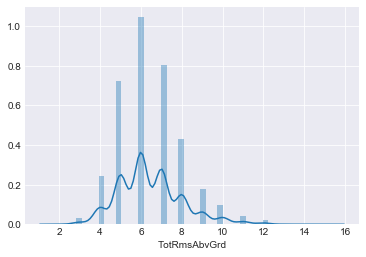

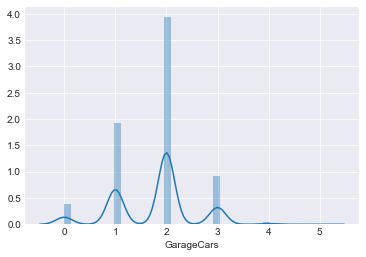

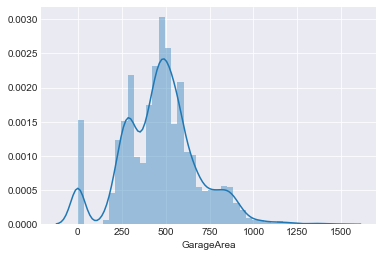

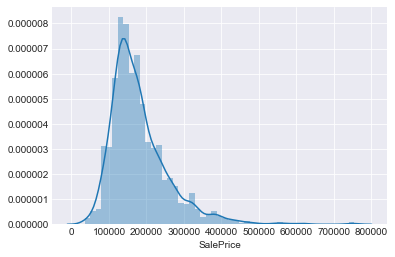

In [219]:
for feature in price_correlation.index:
    plt.figure()
    sns.distplot(all_data[feature].dropna())

- These features are not normally distributed - Maybe a transformation will be required.

#### 1.2 - Categoric Features

In [210]:
all_data.replace(map_values, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


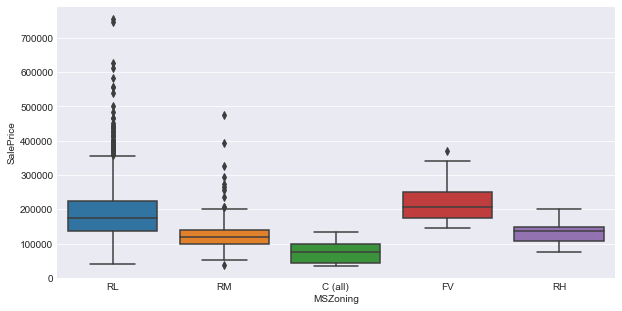

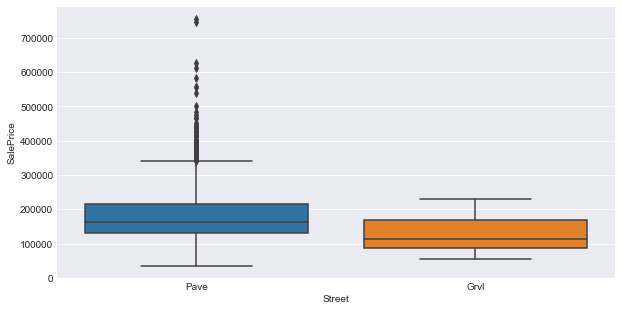

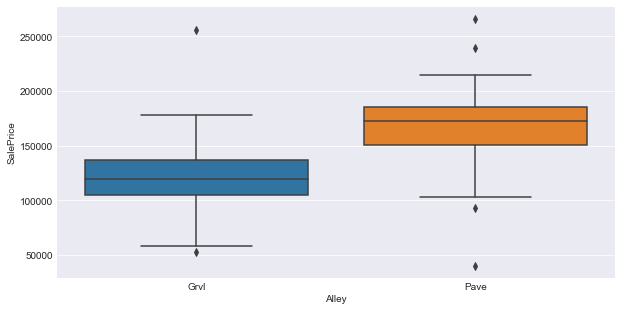

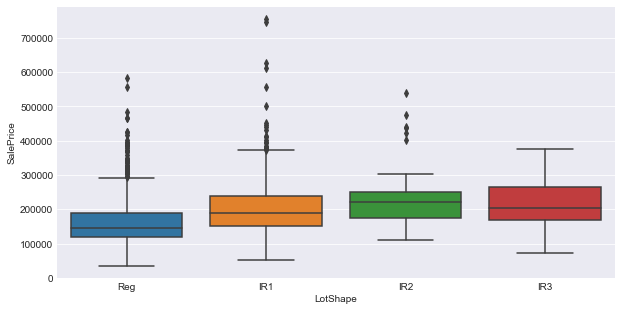

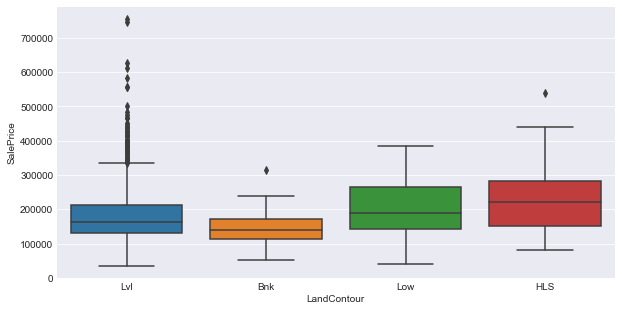

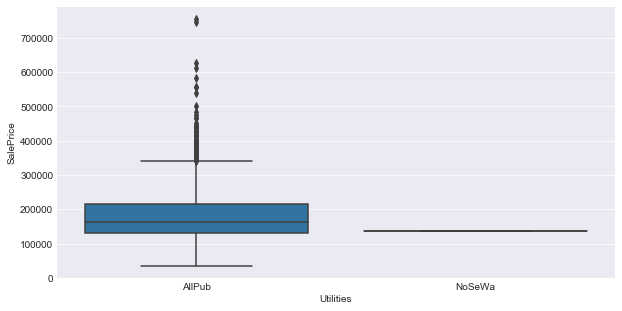

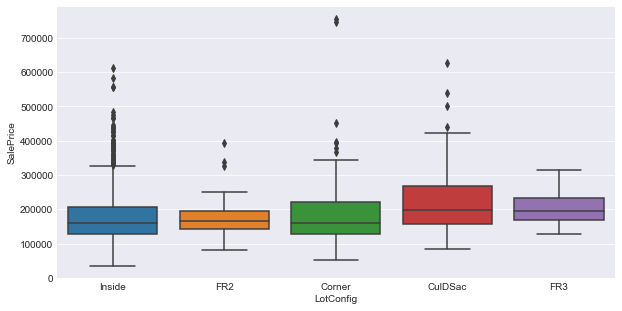

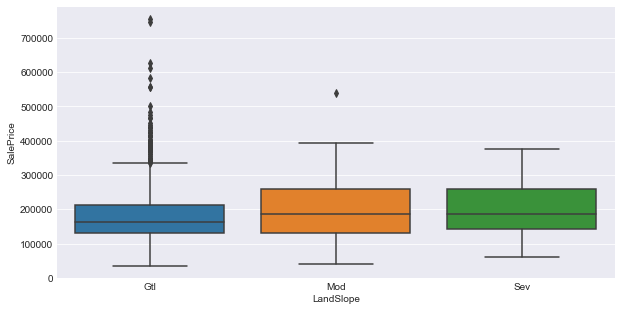

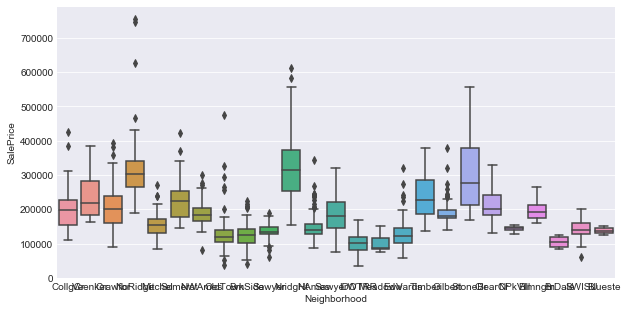

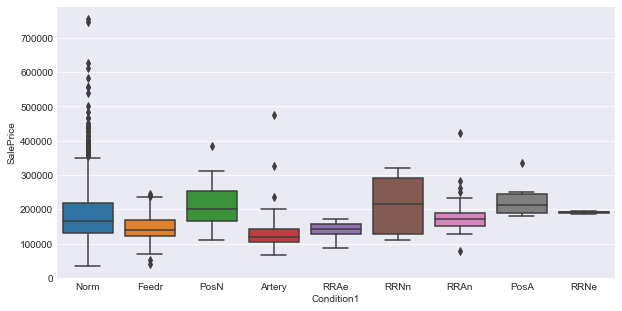

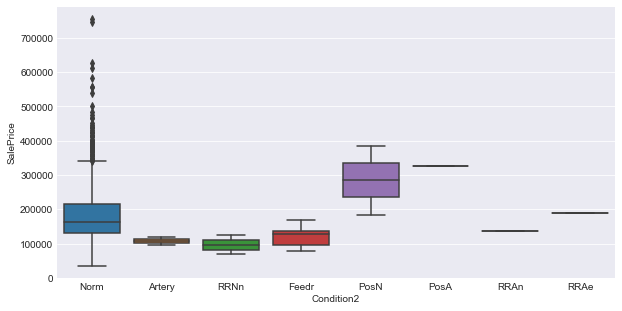

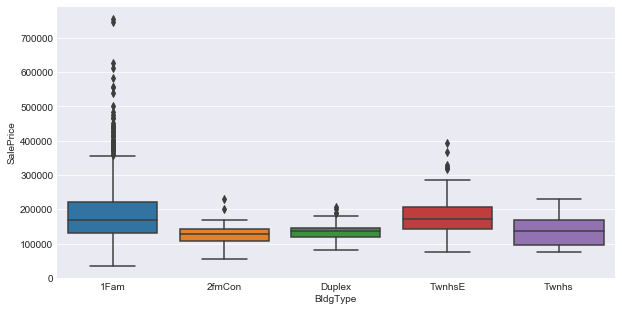

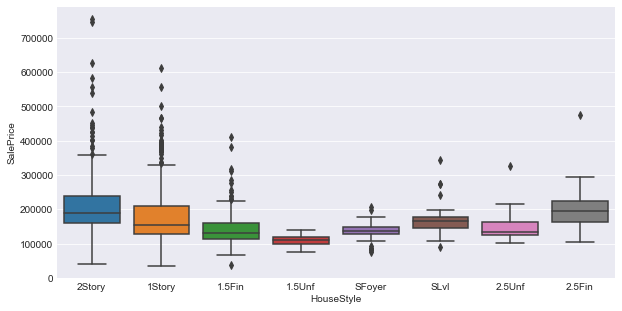

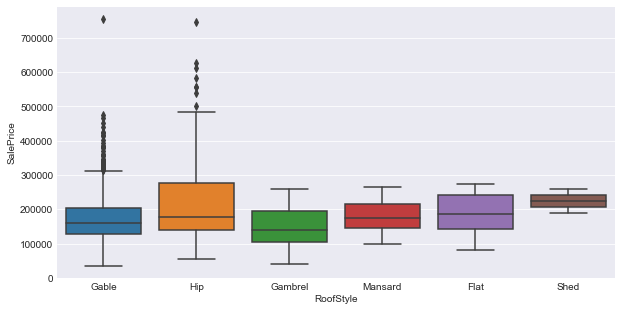

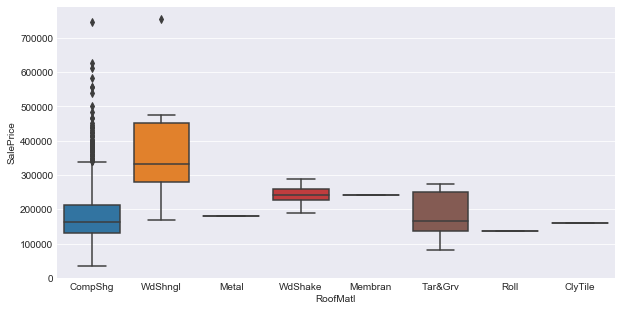

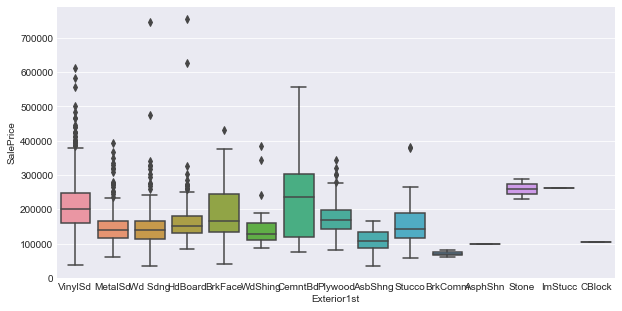

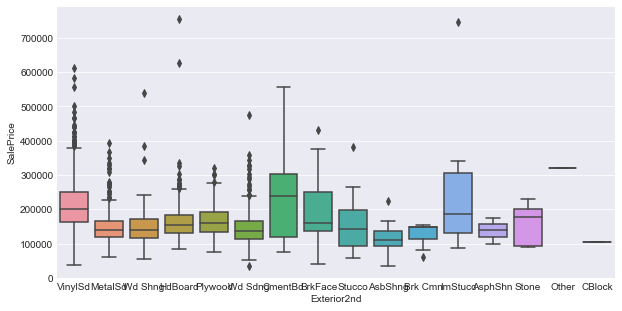

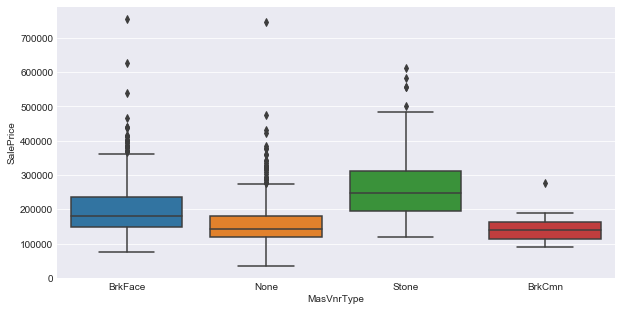

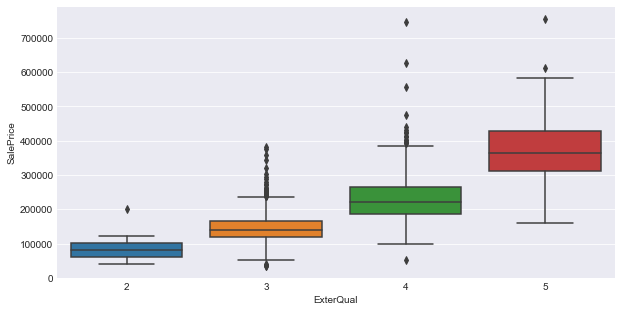

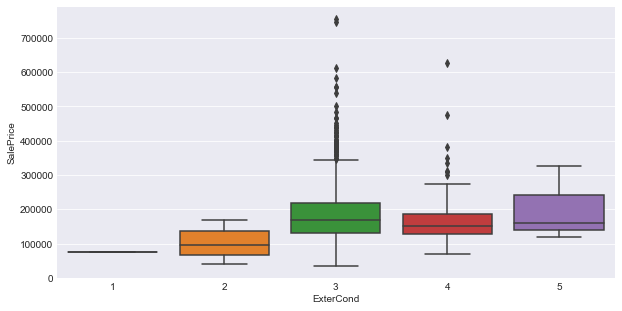

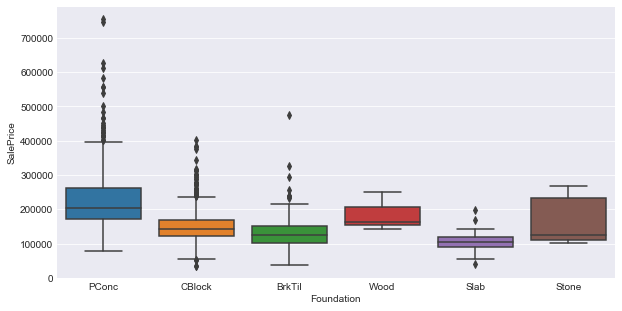

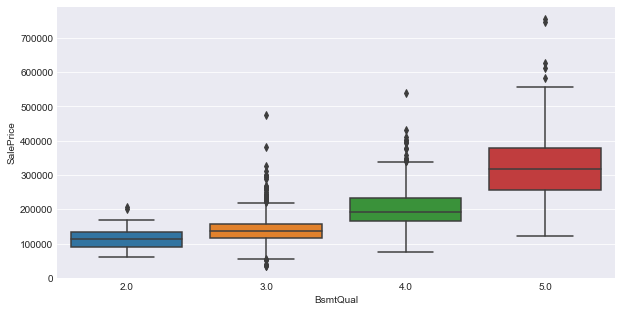

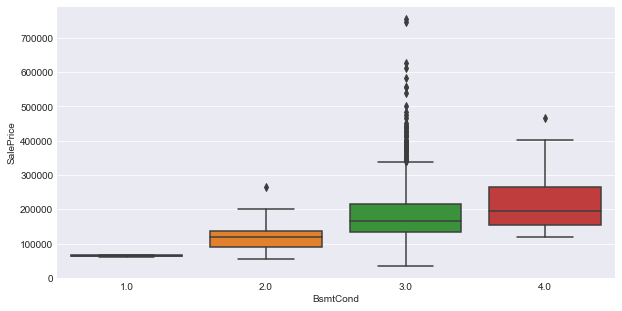

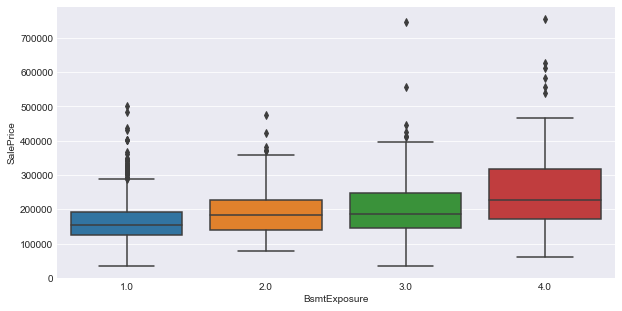

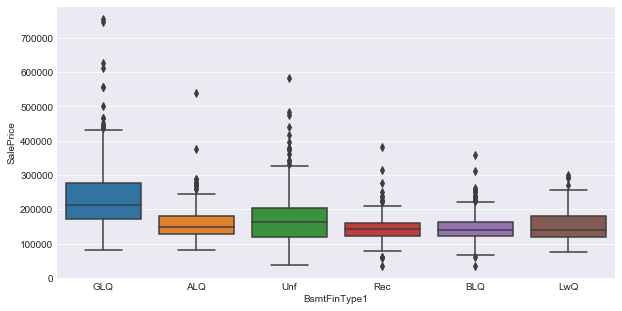

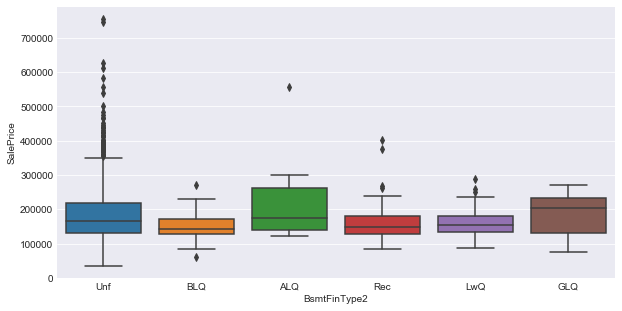

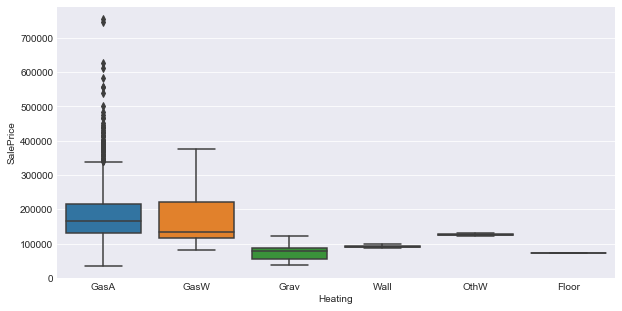

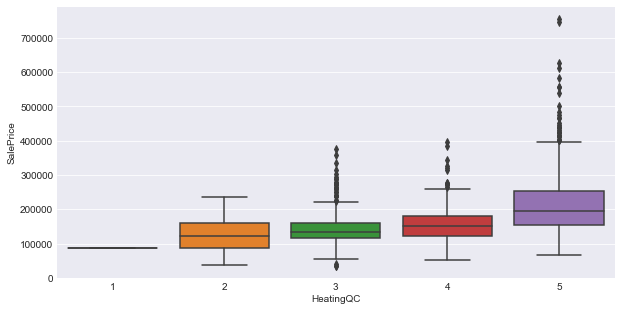

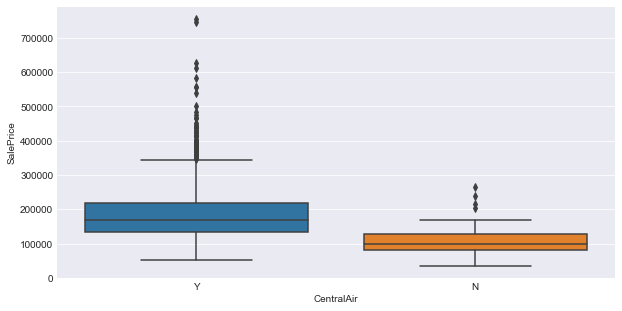

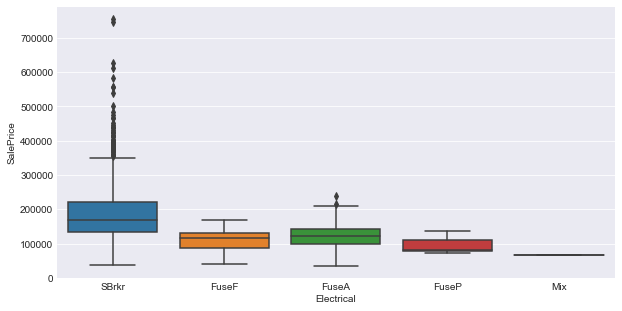

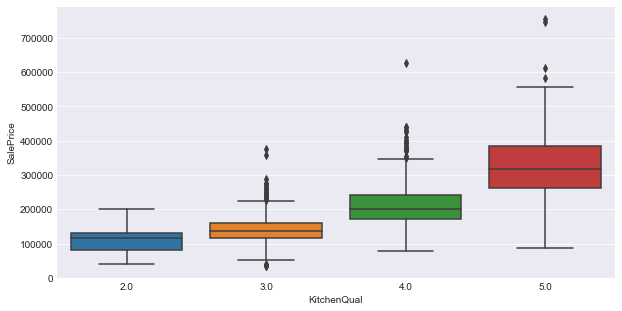

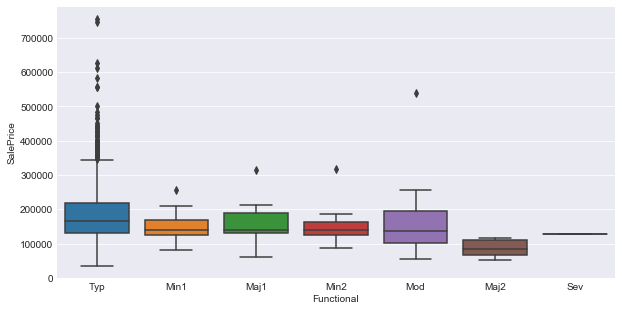

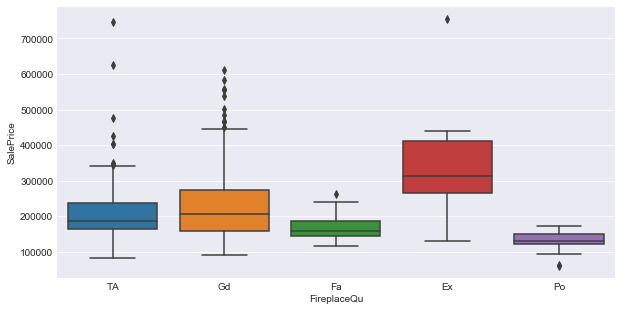

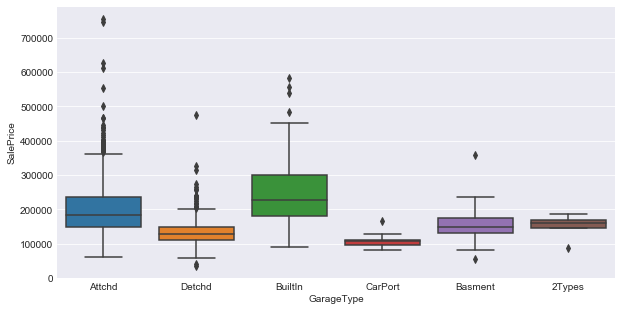

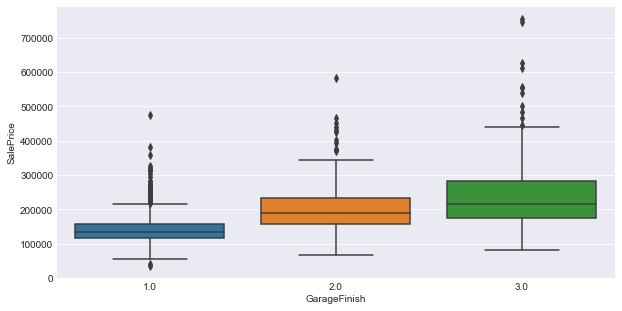

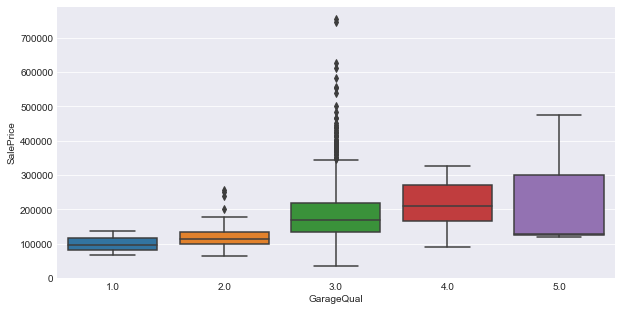

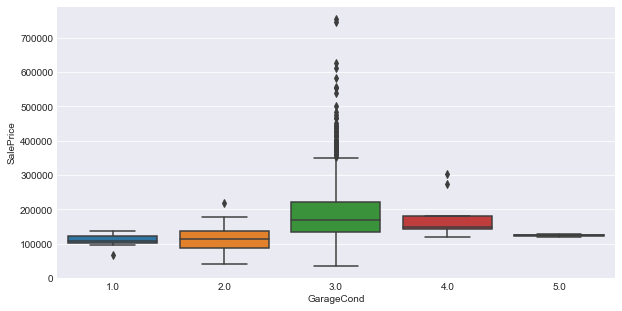

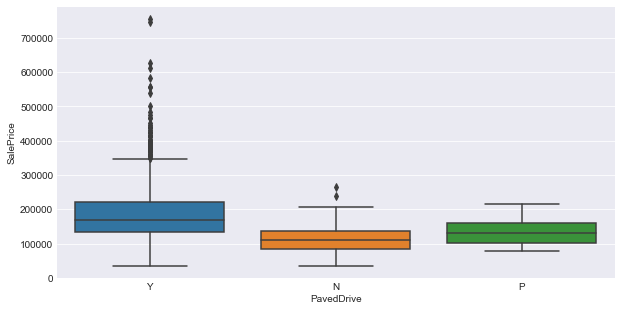

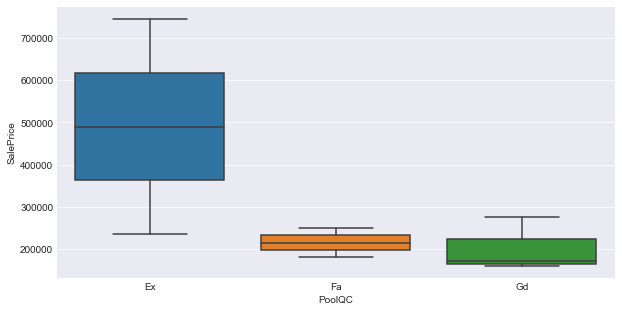

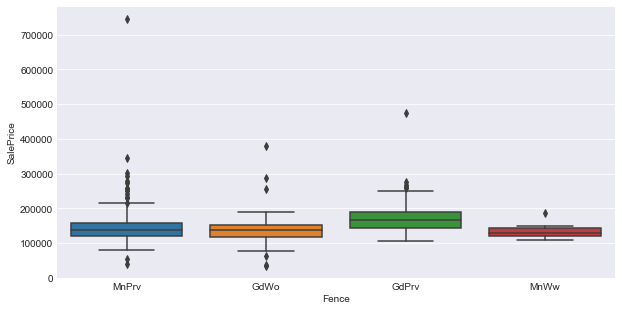

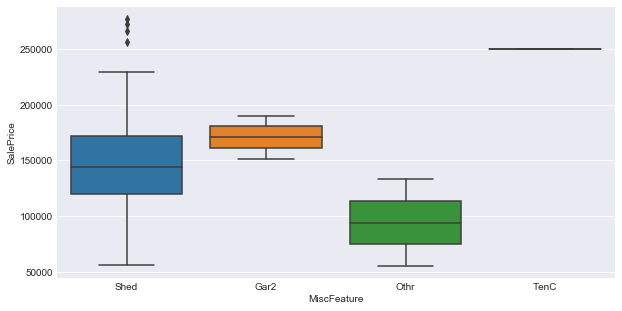

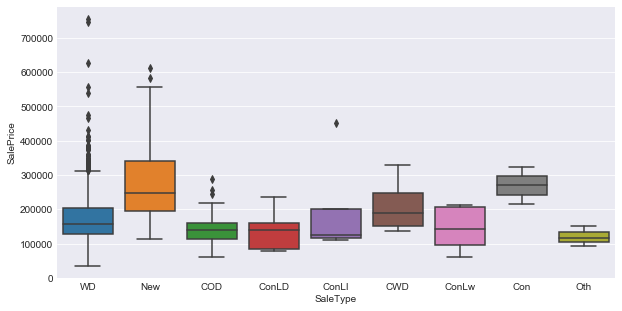

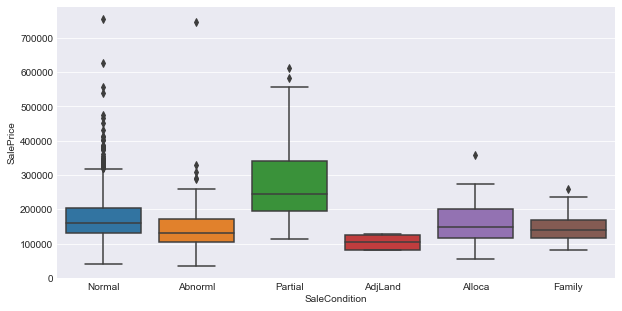

In [211]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=all_data, x=feature, y='SalePrice')

### 2 - Missing Values

The objective of this step is to find the features missing ratio. 
The ideia is to decide if the feature should be eliminated or if it's worth inputing values.

In [156]:
def missing_ratio():
    missing = (all_data.isnull().sum() / all_data.shape[0]) * 100
    df_nulls = pd.DataFrame(data={'Column': missing.index.values, 'Ratio': missing.values})
    df_nulls.sort_values(by='Ratio', ascending=False, inplace=True)
    return df_nulls

In [172]:
null_ratios = missing_ratio()
null_ratios[null_ratios['Ratio'] > 0]

Column      Ratio
72        PoolQC  99.657417
74   MiscFeature  96.402878
6          Alley  93.216855
73         Fence  80.438506
80     SalePrice  49.982871
57   FireplaceQu  48.646797
3    LotFrontage  16.649538
60  GarageFinish   5.447071
63    GarageQual   5.447071
64    GarageCond   5.447071
59   GarageYrBlt   5.447071
58    GarageType   5.378554
32  BsmtExposure   2.809181
31      BsmtCond   2.809181
30      BsmtQual   2.774923
35  BsmtFinType2   2.740665
33  BsmtFinType1   2.706406
25    MasVnrType   0.822199
26    MasVnrArea   0.787941
2       MSZoning   0.137033
55    Functional   0.068517
48  BsmtHalfBath   0.068517
47  BsmtFullBath   0.068517
9      Utilities   0.068517
34    BsmtFinSF1   0.034258
36    BsmtFinSF2   0.034258
78      SaleType   0.034258
42    Electrical   0.034258
61    GarageCars   0.034258
38   TotalBsmtSF   0.034258
62    GarageArea   0.034258
24   Exterior2nd   0.034258
23   Exterior1st   0.034258
53   KitchenQual   0.034258
37     BsmtUnfSF   0.034258

In [ ]:
# Im setting a threshold of 25% for missing ratio, i.e. variables with more than that will be deleted.
features_to_drop = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

In [158]:

                   
                   ['GarageFinish','GarageQual','GarageCond','GarageYrBlt',
                   'GarageType','BsmtExposure','BsmtCond', 'BsmtQual',
                   'BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea',
                   'MSZoning','Functional','BsmtHalfBath','BsmtFullBath',
                   'Utilities','BsmtFinSF1','BsmtFinSF2','SaleType',
                   'Electrical','Exterior2nd','Exterior1st','KitchenQual',
                   'BsmtUnfSF']
#all_data.drop(features_to_drop, axis=1, inplace=True)

In [161]:
# Numeric Features Defined.
numeric_features = all_data[correlation.index.values]

In [162]:
# Now lets check the categorical features.
#categorical_features = all_data.select_dtypes(include=['object'])

#for feature in categorical_features.columns:
#    plt.figure(figsize=(10,5))
#    sns.boxplot(x=all_data[feature], y=all_data['SalePrice'])

### Outlier Detection

The idea here is to plot some scatter plots in order to identify outliers.

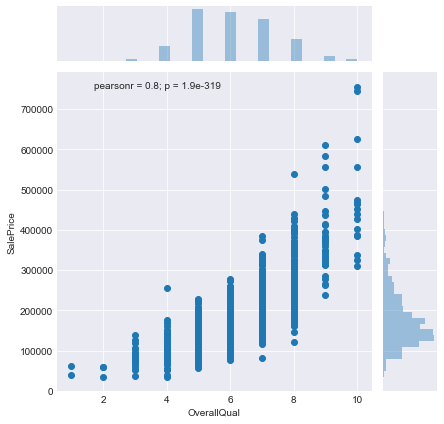

In [163]:
sns.jointplot(data=selected_features, x='OverallQual', y='SalePrice')

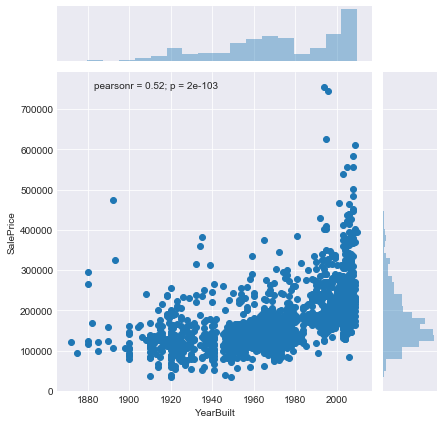

In [164]:
sns.jointplot(data=selected_features, x='YearBuilt', y='SalePrice')

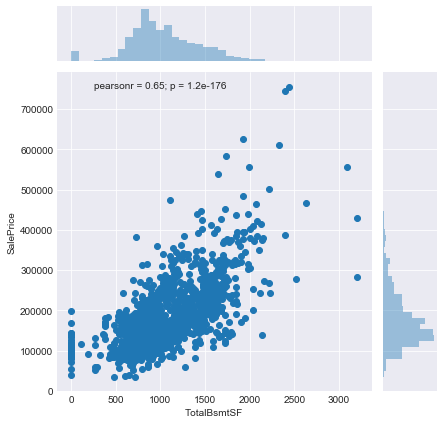

In [165]:
sns.jointplot(data=selected_features, x='TotalBsmtSF', y='SalePrice')

In [166]:
# This house seem to be an outlier because of its price and the TotalBsmtSF value. I'll remove it later.
selected_features[selected_features['TotalBsmtSF'] > 6000]

Empty DataFrame
Columns: [OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea, SalePrice]
Index: []

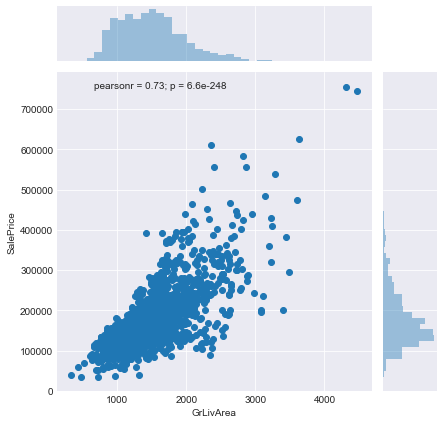

In [167]:
sns.jointplot(data=selected_features, x='GrLivArea', y='SalePrice')

In [168]:
# These two houses also seem to be outliers, so i'm also removing them.
selected_features[selected_features['GrLivArea'] > 4500]

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
1089           10       2008          2009       5095.0      5095       5095   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
1089         2            15         3.0      1154.0        NaN

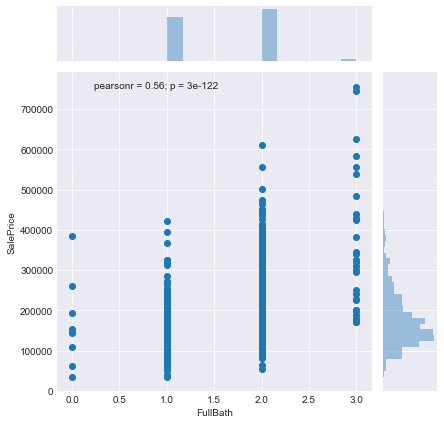

In [169]:
sns.jointplot(data=selected_features, x='FullBath', y='SalePrice')

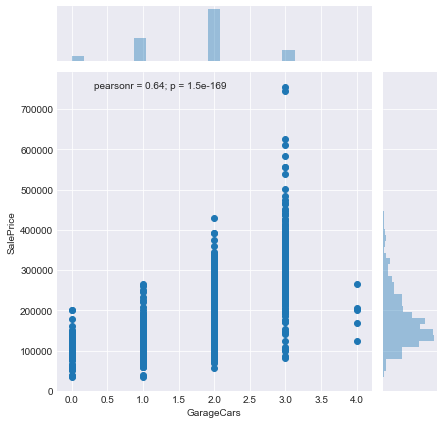

In [170]:
sns.jointplot(data=selected_features, x='GarageCars', y='SalePrice')

#### Removing Outliers

In [171]:
selected_features.drop([523, 1298], inplace=True)

KeyError: '[523 1298] not found in axis'

In [ ]:
sns.jointplot(data=selected_features, x='TotalBsmtSF', y='SalePrice')

In [ ]:
sns.jointplot(data=selected_features, x='GrLivArea', y='SalePrice')

## Feature Selection / Engineering

In [ ]:
# Checking correlations between the selected features to avoid multicolinearity.
#plt.figure(figsize=(15,10))
#sns.heatmap(selected_features.corr(), cmap='viridis', linewidths=.01, annot=True, vmax=0.8)

In [ ]:
#Removing highly correlated features

# TotalBsmtSF and 1stFlrSF - Keeping TotalBsmtSF
#selected_features.drop('1stFlrSF', axis=1, inplace=True)
# GrLivArea and TotRmsAbvGrd - Keeping GrLivArea because of higher correlation with SalePrice.
#selected_features.drop('TotRmsAbvGrd', axis=1, inplace=True)
# GarageCars and GarageArea - Keeping GarageCars because of higher correlation with SalePrice.
#selected_features.drop('GarageArea', axis=1, inplace=True)

In [198]:
ord_values = {"GarageCond" : {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "GarageQual" : {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "GarageFinish": {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3},
              "BsmtExposure": {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4},
              "BsmtCond" : {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "BsmtQual" : {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "ExterQual":  {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
              "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}

dummy = "GarageType", "MSZoning", "Exterior1st", "PavedDrive","LotConfig", "Neighborhood", "Condition1", "Condition2", "Foundation", "Street", "CentralAir",

## Model And Validation

## Submission